In [4]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#importing counties data
contries_data=pd.read_csv('datasets\countries_of_the_world.csv',decimal=',')

In [6]:
contries_data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [7]:
#here lot of columns are there but we need to work with some columns only so i am choiceing some columns
columns=['Country', 
                 'Region',
                 'Population', 
                 'Coastline (coast/area ratio)',
                 'GDP ($ per capita)', 
                 'Literacy (%)', 
                 'Birthrate']

In [21]:
new_data=contries_data[columns]

In [22]:
#here we got over required data colunms
new_data.head()

,Country,Region,Population,Coastline (coast/area ratio),GDP ($ per capita),Literacy (%),Birthrate
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,0.00,700.0,36.0,46.60
1,Albania,EASTERN EUROPE,3581655,1.26,4500.0,86.5,15.11
2,Algeria,NORTHERN AFRICA,32930091,0.04,6000.0,70.0,17.14
3,American Samoa,OCEANIA,57794,58.29,8000.0,97.0,22.46
4,Andorra,WESTERN EUROPE,71201,0.00,19000.0,100.0,8.71


In [23]:
# here i am checking that data has any missing values
new_data.isnull().sum()

Country                          0
Region                           0
Population                       0
Coastline (coast/area ratio)     0
GDP ($ per capita)               1
Literacy (%)                    18
Birthrate                        3
dtype: int64

In [24]:
# i am droping the missing data
new_data_nonull=new_data.dropna()
new_data_nonull.head()


,Country,Region,Population,Coastline (coast/area ratio),GDP ($ per capita),Literacy (%),Birthrate
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,0.00,700.0,36.0,46.60
1,Albania,EASTERN EUROPE,3581655,1.26,4500.0,86.5,15.11
2,Algeria,NORTHERN AFRICA,32930091,0.04,6000.0,70.0,17.14
3,American Samoa,OCEANIA,57794,58.29,8000.0,97.0,22.46
4,Andorra,WESTERN EUROPE,71201,0.00,19000.0,100.0,8.71


In [25]:
#checking is there any null value after droping those
new_data_nonull.isnull().sum()

Country                         0
Region                          0
Population                      0
Coastline (coast/area ratio)    0
GDP ($ per capita)              0
Literacy (%)                    0
Birthrate                       0
dtype: int64

In [26]:
#by seeing data 
new_data_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 226
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       207 non-null    object 
 1   Region                        207 non-null    object 
 2   Population                    207 non-null    int64  
 3   Coastline (coast/area ratio)  207 non-null    float64
 4   GDP ($ per capita)            207 non-null    float64
 5   Literacy (%)                  207 non-null    float64
 6   Birthrate                     207 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 12.9+ KB


In [44]:
#checking how many unique region are there
new_data_nonull['Region'].unique()

array(['ASIA (EX. NEAR EAST)         ',
       'EASTERN EUROPE                     ',
       'NORTHERN AFRICA                    ',
       'OCEANIA                            ',
       'WESTERN EUROPE                     ',
       'SUB-SAHARAN AFRICA                 ', 'LATIN AMER. & CARIB    ',
       'C.W. OF IND. STATES ', 'NEAR EAST                          ',
       'NORTHERN AMERICA                   ',
       'BALTICS                            '], dtype=object)

In [45]:
#grouping with region
data_group=new_data_nonull.groupby(by='Region').mean()

In [46]:
data_group

,Population,Coastline (coast/area ratio),GDP ($ per capita),Literacy (%),Birthrate
Region,,,,,
ASIA (EX. NEAR EAST),1.317137e+08,17.926786,8053.571429,79.553571,21.157857
BALTICS,2.394991e+06,3.116667,11300.000000,99.733333,9.343333
C.W. OF IND. STATES,2.334013e+07,0.093333,4000.000000,98.725000,17.855833
EASTERN EUROPE,1.231617e+07,1.547500,11175.000000,97.600000,10.330000
LATIN AMER. & CARIB,1.276627e+07,16.111591,8488.636364,90.654545,19.197500
NEAR EAST,1.365565e+07,3.323571,11850.000000,79.521429,23.527857
NORTHERN AFRICA,3.222682e+07,0.298000,5460.000000,67.240000,20.814000
NORTHERN AMERICA,8.290399e+07,61.540000,27625.000000,97.750000,12.460000
OCEANIA,2.027042e+06,113.983750,10056.250000,91.262500,20.910000


In [47]:
%matplotlib inline

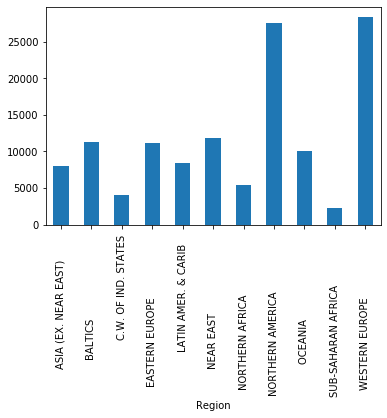

In [48]:
data_group['GDP ($ per capita)'].plot(kind='bar')

In [49]:
#changing cloumn names
data_group.rename(columns={'GDP ($ per capita)':'COUNTRY_GDP'})# this is temporary change

,Population,Coastline (coast/area ratio),COUNTRY_GDP,Literacy (%),Birthrate
Region,,,,,
ASIA (EX. NEAR EAST),1.317137e+08,17.926786,8053.571429,79.553571,21.157857
BALTICS,2.394991e+06,3.116667,11300.000000,99.733333,9.343333
C.W. OF IND. STATES,2.334013e+07,0.093333,4000.000000,98.725000,17.855833
EASTERN EUROPE,1.231617e+07,1.547500,11175.000000,97.600000,10.330000
LATIN AMER. & CARIB,1.276627e+07,16.111591,8488.636364,90.654545,19.197500
NEAR EAST,1.365565e+07,3.323571,11850.000000,79.521429,23.527857
NORTHERN AFRICA,3.222682e+07,0.298000,5460.000000,67.240000,20.814000
NORTHERN AMERICA,8.290399e+07,61.540000,27625.000000,97.750000,12.460000
OCEANIA,2.027042e+06,113.983750,10056.250000,91.262500,20.910000


In [50]:
data_group

,Population,Coastline (coast/area ratio),GDP ($ per capita),Literacy (%),Birthrate
Region,,,,,
ASIA (EX. NEAR EAST),1.317137e+08,17.926786,8053.571429,79.553571,21.157857
BALTICS,2.394991e+06,3.116667,11300.000000,99.733333,9.343333
C.W. OF IND. STATES,2.334013e+07,0.093333,4000.000000,98.725000,17.855833
EASTERN EUROPE,1.231617e+07,1.547500,11175.000000,97.600000,10.330000
LATIN AMER. & CARIB,1.276627e+07,16.111591,8488.636364,90.654545,19.197500
NEAR EAST,1.365565e+07,3.323571,11850.000000,79.521429,23.527857
NORTHERN AFRICA,3.222682e+07,0.298000,5460.000000,67.240000,20.814000
NORTHERN AMERICA,8.290399e+07,61.540000,27625.000000,97.750000,12.460000
OCEANIA,2.027042e+06,113.983750,10056.250000,91.262500,20.910000


In [55]:
data_group.rename(columns={'GDP ($ per capita)':'COUNTRY_GDP','Coastline (coast/area ratio)':'Coastlinearea','Literacy (%)':'literacy'},inplace=True)

In [64]:
data_group

,Population,Coastlinearea,COUNTRY_GDP,literacy,Birthrate
Region,,,,,
ASIA (EX. NEAR EAST),1.317137e+08,17.926786,8053.571429,79.553571,21.157857
BALTICS,2.394991e+06,3.116667,11300.000000,99.733333,9.343333
C.W. OF IND. STATES,2.334013e+07,0.093333,4000.000000,98.725000,17.855833
EASTERN EUROPE,1.231617e+07,1.547500,11175.000000,97.600000,10.330000
LATIN AMER. & CARIB,1.276627e+07,16.111591,8488.636364,90.654545,19.197500
NEAR EAST,1.365565e+07,3.323571,11850.000000,79.521429,23.527857
NORTHERN AFRICA,3.222682e+07,0.298000,5460.000000,67.240000,20.814000
NORTHERN AMERICA,8.290399e+07,61.540000,27625.000000,97.750000,12.460000
OCEANIA,2.027042e+06,113.983750,10056.250000,91.262500,20.910000


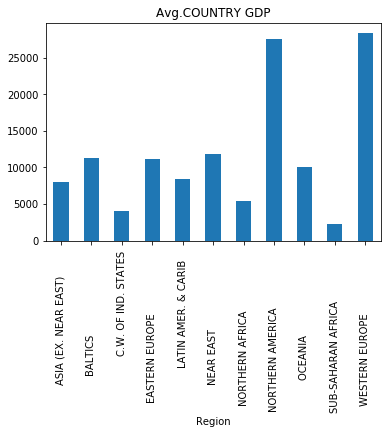

In [65]:
data_group['COUNTRY_GDP'].plot(kind='bar',title='Avg.COUNTRY GDP')

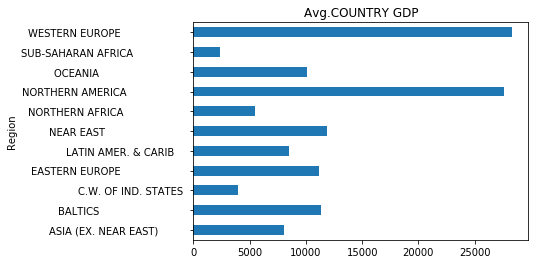

In [66]:
#horizontal view
data_group['COUNTRY_GDP'].plot(kind='barh',title='Avg.COUNTRY GDP')

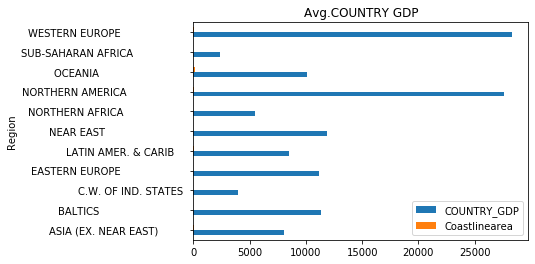

In [70]:
data_group[['COUNTRY_GDP','Coastlinearea']].plot(kind='barh',title='Avg.COUNTRY GDP')

In [12]:
new_data_nonull.head()

,Country,Region,Population,Coastline (coast/area ratio),GDP ($ per capita),Literacy (%),Birthrate
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,0.00,700.0,36.0,46.60
1,Albania,EASTERN EUROPE,3581655,1.26,4500.0,86.5,15.11
2,Algeria,NORTHERN AFRICA,32930091,0.04,6000.0,70.0,17.14
3,American Samoa,OCEANIA,57794,58.29,8000.0,97.0,22.46
4,Andorra,WESTERN EUROPE,71201,0.00,19000.0,100.0,8.71


In [15]:
data_extract=new_data_nonull[['Region','Population']]
data=data_extract.groupby(by='Region').sum()

In [18]:
data.shape

(11, 1)

In [19]:
data

,Population
Region,
ASIA (EX. NEAR EAST),3687982236
BALTICS,7184974
C.W. OF IND. STATES,280081548
EASTERN EUROPE,98529328
LATIN AMER. & CARIB,561715994
NEAR EAST,191179128
NORTHERN AFRICA,161134125
NORTHERN AMERICA,331615946
OCEANIA,32432670


In [20]:
data.plot.pie('Population')

TypeError: pie() takes 1 positional argument but 2 were given

In [27]:
data=pd.read_csv('datasets\countries_of_the_world.csv',decimal=',')

In [28]:
data=data.dropna()

In [29]:
data.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [39]:
data_polt=pd.DataFrame(data[['Region','Population']].groupby(by='Region').sum())

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C8B0314448>],
      dtype=object)

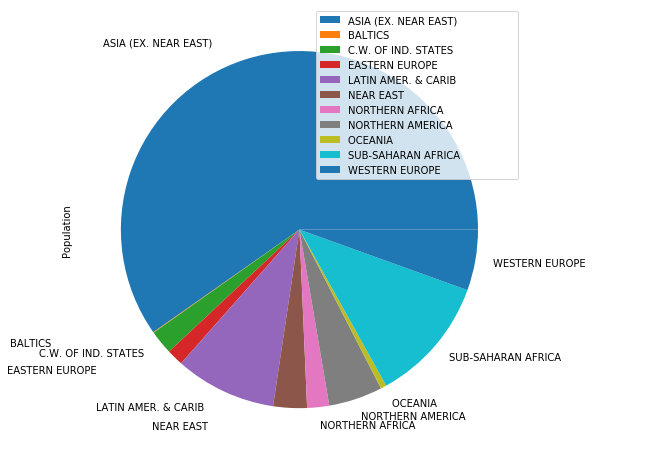

In [49]:
data_polt.plot.pie(subplots=True,figsize=(8,10))

# 9959152449


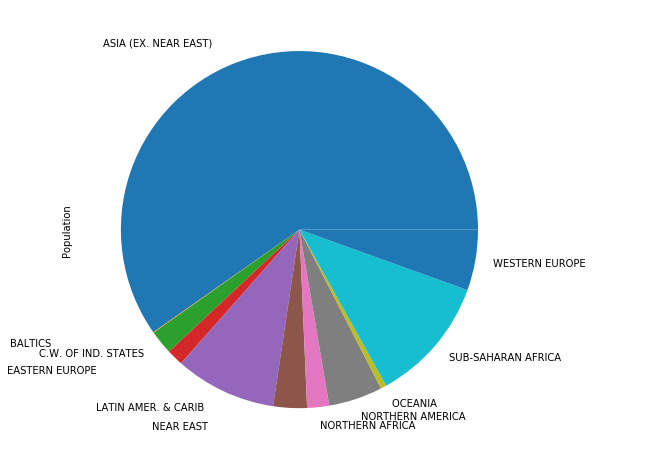

In [51]:
data_polt.plot.pie(y='Population',figsize=(8,10),legend=False)

In [52]:
data_polt.head()

,Population
Region,
ASIA (EX. NEAR EAST),3658632312
BALTICS,3599068
C.W. OF IND. STATES,132721302
EASTERN EUROPE,92024232
LATIN AMER. & CARIB,561685403


In [53]:
data_polt['Population'].describe()

count    1.100000e+01
mean     5.567575e+08
std      1.051676e+09
min      3.599068e+06
25%      1.070082e+08
50%      1.865208e+08
75%      4.492886e+08
max      3.658632e+09
Name: Population, dtype: float64

In [54]:
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743


In [58]:
data.Population.describe()

count    1.790000e+02
mean     3.421415e+07
std      1.317639e+08
min      1.347700e+04
25%      1.188580e+06
50%      6.940432e+06
75%      2.086014e+07
max      1.313974e+09
Name: Population, dtype: float64

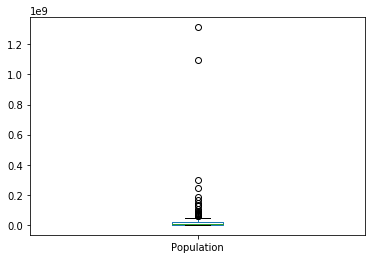

In [59]:
data.Population.plot(kind='box')

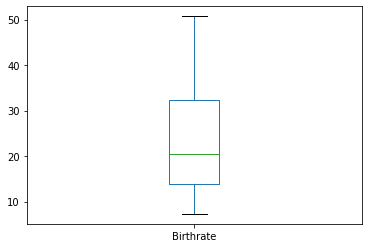

In [60]:
data.Birthrate.plot(kind='box')

# midle line is medium and box top line is 75 % and bottom line is 25 % of the data top whiskas line is maximum line as well as bottom is minimum

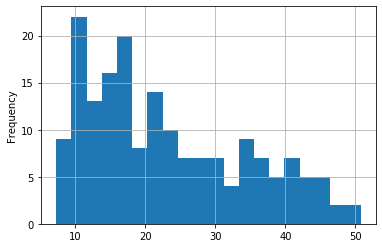

In [64]:
data.Birthrate.plot(kind='hist',bins=20,grid=True)